In [82]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from numpy import matmul, kron, sqrt, array
from numpy.linalg import norm
from qiskit.circuit.library import CXGate
from numpy.random import randint

In [2]:
def ket_times_bra(v1, v2):
    return Operator(matmul(array([v1]).T, array([v2])))

def get_measure(vectors):
    measure = ket_times_bra(vectors[0], vectors[0])
    for v in vectors[1:]:
        measure +=  ket_times_bra(v, v)
    return measure


In [13]:
ket0 = Statevector([1, 0, 0])
ket1 = Statevector([0, 1, 0])
ket2 = Statevector([0, 0, 1])
(ket_times_bra(ket0, ket0) + ket_times_bra(ket1, ket1) - ket_times_bra(ket2, ket2)).draw("latex")
((1/3)*ket_times_bra(ket0 + ket1 + ket2, ket0 + ket1 + ket2)).draw("latex")

<IPython.core.display.Latex object>

In [26]:
ket0 = Statevector([1, 0])
ket1 = Statevector([0, 1])
display(ket_times_bra((2*ket0 - ket1), -9*ket0 + 3 *ket1).draw("latex"))
display((
    2*ket_times_bra(ket0, ket0) - ket_times_bra(ket0, ket1) - 9*ket_times_bra(ket1, ket0) + 3*ket_times_bra(ket1, ket1)
).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [37]:
v = .5*Statevector([sqrt(2), -sqrt(2/3), 2j/sqrt(3)])
#v = Statevector([1j/sqrt(3), 1/sqrt(2), -1/sqrt(6)])
v = (1/(sqrt(6) - sqrt(2) + 2j))*Statevector([sqrt(6), -sqrt(2), 2j])
v = Statevector([(1j-sqrt(3))/(2*sqrt(3)), -(1-1j)/(sqrt(12)), 1/sqrt(2)])
display(v.draw("latex"))
display(v.is_valid())

<IPython.core.display.Latex object>

True

In [46]:
from itertools import product
gamma = ["clubs", "diamonds", "hearts", "spades"]
crossProd = product(gamma, gamma)
i = 0
for val in crossProd:
    print(val, ": ", i)
    i += 1

('clubs', 'clubs') :  0
('clubs', 'diamonds') :  1
('clubs', 'hearts') :  2
('clubs', 'spades') :  3
('diamonds', 'clubs') :  4
('diamonds', 'diamonds') :  5
('diamonds', 'hearts') :  6
('diamonds', 'spades') :  7
('hearts', 'clubs') :  8
('hearts', 'diamonds') :  9
('hearts', 'hearts') :  10
('hearts', 'spades') :  11
('spades', 'clubs') :  12
('spades', 'diamonds') :  13
('spades', 'hearts') :  14
('spades', 'spades') :  15


In [48]:
u = Statevector([-2, 1])
v = Statevector([1, 0, 1])
w = Statevector([4, 1])
x = Statevector([1/2, 1/2, 1/2])
(u.tensor(v) - (2/3)*w.tensor(x)).draw("latex")

<IPython.core.display.Latex object>

In [54]:
ket0 = Statevector([1, 0])
ket1 = Statevector([0, 1])
ketp = Statevector([1/sqrt(2), 1/sqrt(2)])
ketm = Statevector([1/sqrt(2), -1/sqrt(2)])
ket_psi = (1/sqrt(3))*(ket0.tensor(ketp).tensor(ketm) + ket1.tensor(ket0).tensor(ket0) - ket1.tensor(ket1).tensor(ket1))
ket_psi.draw("latex")


<IPython.core.display.Latex object>

In [59]:
a = Statevector([1, 0, 0])
b = Statevector([0, 1, 0])
c = Statevector([0, 0, 1])
new = ((a.tensor(b) + c.tensor(b))/sqrt(2))
new.probabilities_dict()

{'01': 0.4999999999999999, '21': 0.4999999999999999}

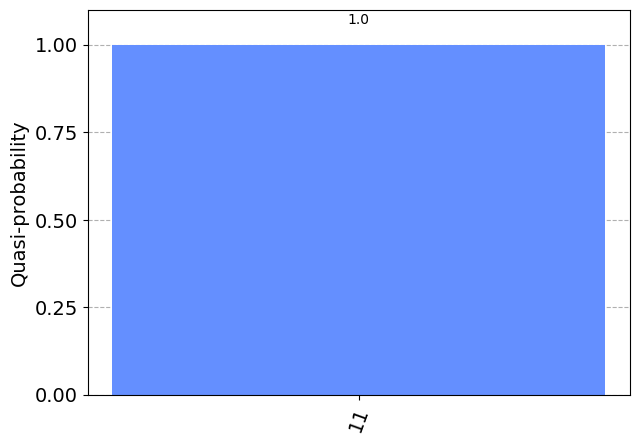

In [100]:
c = QuantumCircuit(2)
c.initialize(Statevector.from_label("10"))
c.h(0)
c.cx(0, 1)
c.z(1)
c.cx(1, 0)
c.h(1)
c.measure_all()
c.draw("mpl")
results = Sampler().run(c).result()

data = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(data))


In [97]:
ket0 = Statevector([1, 0])
ket1 = Statevector([0, 1])
H = Operator.from_label("H")
CX = Operator(CXGate().to_matrix())
Z = Operator.from_label("Z")
I = Operator.from_label("I")
q0 = ket0
q1 = ket1

q0 = q0.evolve(H)

q0.tensor(q1).evolve(CX).evolve(I ^ Z).evolve(CX).evolve(I ^ H).draw("latex")


<IPython.core.display.Latex object>

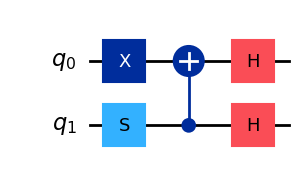

In [125]:
X = Operator.from_label("X")
H = Operator.from_label("H")
S = Operator.from_label("S")
CX = Operator(CXGate().to_matrix())
c = QuantumCircuit(2)
c.x(0)
c.s(1)
c.cx(1, 0)
c.h(1)
c.h(0)
c.draw("mpl")



In [155]:
from numpy.linalg import inv
X = Operator.from_label("X")
S = Operator.from_label("S")
CX = Operator(CXGate().to_matrix())
H = Operator.from_label("H")
left = X.tensor(S)
display(left.draw("latex"))
display(CX.draw("latex"))
right = H.tensor(H)
display(right.draw("latex"))
total = left.compose(CX).compose(right)
total.draw("latex")


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [179]:
psi0 = Statevector([1/sqrt(3), sqrt(2/3)])
psi1 = Statevector([sqrt(2/3), -1/sqrt(3)])
PI0 = ket_times_bra(psi0, psi0)
PI1 = ket_times_bra(psi1, psi1)

v = Statevector([1/sqrt(5), -sqrt(2/5), sqrt(2/5), -1/sqrt(5)])
display(v.draw("latex"))
measure = PI0.tensor(I) + PI1.tensor(I)
display(measure.draw("latex"))
v_measured = v.evolve(measure)/norm(v.evolve(measure))
display(v_measured.draw("latex"))
display(v_measured.probabilities_dict())
PI0.tensor(I).draw("latex")
PI1.tensor(I).draw("latex")
PI0 + PI1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

{'00': 0.16666666666666666,
 '01': 0.3333333333333334,
 '10': 0.3333333333333334,
 '11': 0.16666666666666666}

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [180]:
v = Statevector([5/13, 12/13])
u = Statevector([12/13, -5/13])
v.inner(u)

0j